## Heart Disease Prediction
* The problem is : based on the given information about each individual we have to calculate that whether that individual will suffer from heart disease.
* We can train our prediction model by analyzing existing data because we already know whether each patient has heart disease. This process is also known as supervision and learning. The trained model is then used to predict if users suffer from heart disease. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('datasets/cleveland.csv')

In [3]:
data.head()

,63,1,1.1,145,233,1.2,2,150,0,2.3,3,0.1,6,0.2
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


#### renaming columns

In [4]:
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

### 1 = male, 0 = female


#### null values

In [5]:
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [6]:
data['target'] = data.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
data['sex'] = data.sex.map({0: 'female', 1: 'male'})
data['thal'] = data.thal.fillna(data.thal.mean())
data['ca'] = data.ca.fillna(data.ca.mean())

#### distribution of target vs age 

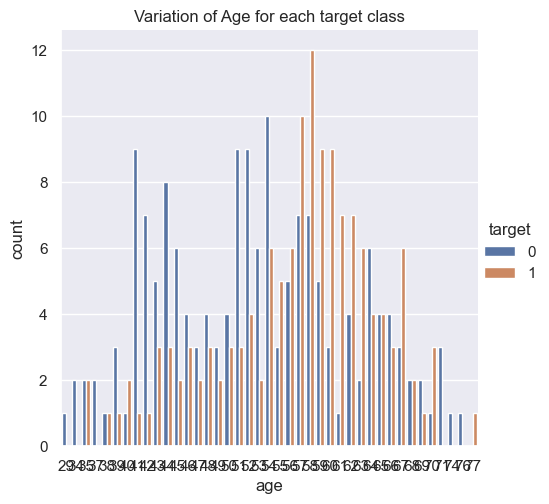

<Figure size 1500x500 with 0 Axes>

In [7]:
sns.set()
sns.catplot(kind = 'count', data = data, x = 'age', hue = 'target', order = data['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.figure(figsize=(15,5))
plt.show()


#### barplot of age vs sex with hue = target

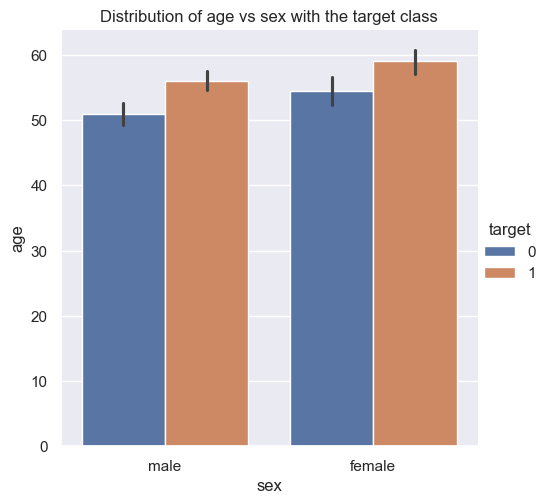

In [8]:
sns.catplot(kind = 'bar', data = data, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

data['sex'] = data.sex.map({'female': 0, 'male': 1})

#### data preprocessing

In [9]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### Different Models

* Standardisation- normalize the range of independent variables or features of data. The objective is to standardize the features of the dataset so that they have a mean of 0 and a standard deviation of 1
* splitting of data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Support Vector Classifier (SVC) 
The Support Vector Classifier (SVC) from sklearn.svm is a supervised machine learning tool that classifies data into categories by finding the best boundary (or "line") that separates different classes.

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for test set for svm = 0.8360655737704918


#### GaussianNB
a supervised learning algorithm in scikit-learn that uses the Gaussian (normal) distribution assumption to classify data points, making it effective for tasks where features are normally distributed.

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for test set for Naive Bayes = 0.8524590163934426


#### LogisticRegression
LogisticRegression in scikit-learn is a machine learning algorithm used for classification tasks where the goal is to predict categorical outcomes (e.g., yes/no, spam/not spam) based on input features by fitting a logistic curve to the data.

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for test set for Logistic Regression = 0.8852459016393442


#### DecisionTreeClassifier 
a machine learning algorithm used for classification tasks. It builds a decision tree model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for test set for Decision Tree = 0.7540983606557377


#### RandomForestClassifier 
a machine learning algorithm used for classification tasks. It builds multiple decision trees and combines their results to improve the accuracy and robustness of the model.

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for test set for Random Forest = 0.819672131147541
